Name  : Bharat suthar
Batch : November
Domain: Data Science

### Importing important Libraries

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Importing Dataset

In [9]:
df = pd.read_csv('advertising.csv')

In [11]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


Aim: Sales prediction involves forcasting the amount of product that customers will purchase, taking into acount various factors such as advertising expenditure, target audience segmention, and advertising platform selection

* Given dataset consist of the advertising platform and the related sales.
let's Visualize each platform

In [12]:
df.shape

(200, 4)

In [13]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [64]:
np.reshape(-1,1)

array([-1])

### Basic Observation

* Avg expense spend is highest on Tv
* Avg expense spend is Lowest on Radio
* Max Sale is 27 and Min is 1.6

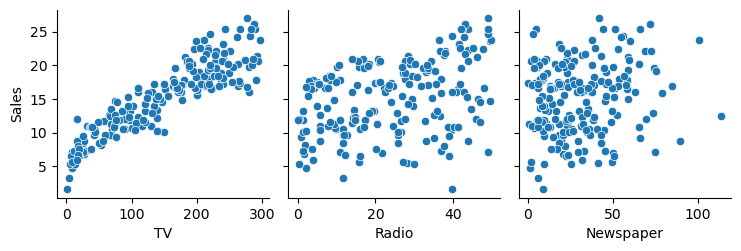

In [19]:
sns.pairplot(df, x_vars=['TV','Radio','Newspaper'],y_vars='Sales',kind='scatter')
plt.show()

#### Pair plot observation

* When advertising cost increases in TV Ads the Sales will increase as well.
While for newspaper and Radio it is unpredictable  

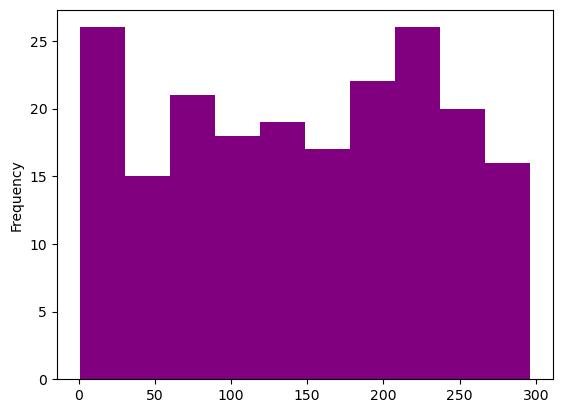

In [26]:
df['TV'].plot.hist(bins=10,color='purple',xlabel="TV")
plt.show()

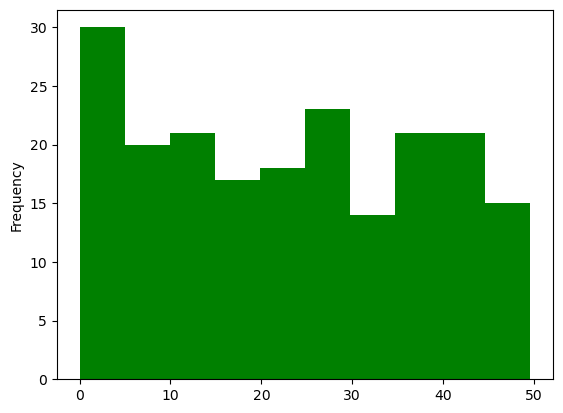

In [27]:
df['Radio'].plot.hist(bins=10,color='green',xlabel="Radio")
plt.show()

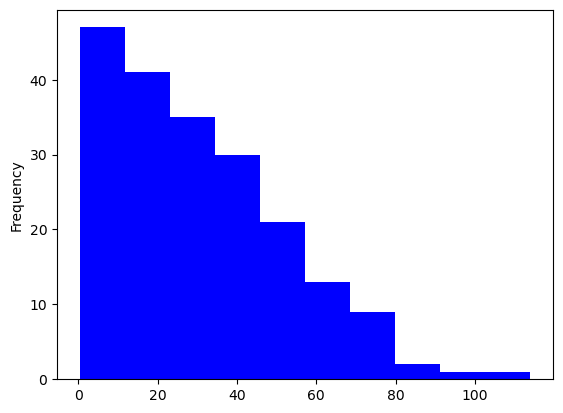

In [28]:
df['Newspaper'].plot.hist(bins=10,color='blue',xlabel="newspaper")
plt.show()

### Histogram Observation

* The majority sales is the result of low advertising  cost in newspaper

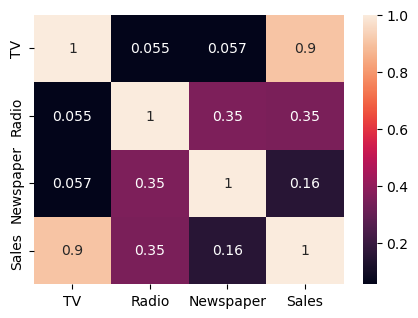

In [90]:
plt.figure(figsize=(5,3.5))
sns.heatmap(df.corr(),annot= True)
plt.show()

#### SALES IS HIGHLY CORELATED WITH THE TV

* let's train our model using linear regression as it is corelated with only one variable TV

In [36]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(df['TV'],df['Sales'],test_size= 0.3, random_state= 0)

In [71]:
print(x_train)

131    265.2
96     197.6
181    218.5
19     147.3
153    171.3
       ...  
67     139.3
192     17.2
117     76.4
47     239.9
172     19.6
Name: TV, Length: 140, dtype: float64


In [38]:
print(x_test)

18      69.2
170     50.0
107     90.4
98     289.7
177    170.2
182     56.2
5        8.7
146    240.1
12      23.8
152    197.6
61     261.3
125     87.2
180    156.6
154    187.8
80      76.4
7      120.2
33     265.6
130      0.7
37      74.7
74     213.4
183    287.6
145    140.3
45     175.1
159    131.7
60      53.5
123    123.1
179    165.6
185    205.0
122    224.0
44      25.1
16      67.8
55     198.9
150    280.7
111    241.7
22      13.2
189     18.7
129     59.6
4      180.8
83      68.4
106     25.0
134     36.9
66      31.5
26     142.9
113    209.6
168    215.4
63     102.7
8        8.6
75      16.9
118    125.7
143    104.6
71     109.8
124    229.5
184    253.8
97     184.9
149     44.7
24      62.3
30     292.9
160    172.5
40     202.5
56       7.3
Name: TV, dtype: float64


In [39]:
print(y_test)

18     11.3
170     8.4
107    12.0
98     25.4
177    16.7
182     8.7
5       7.2
146    18.2
12      9.2
152    16.6
61     24.2
125    10.6
180    15.5
154    20.6
80     11.8
7      13.2
33     17.4
130     1.6
37     14.7
74     17.0
183    26.2
145    10.3
45     16.1
159    12.9
60      8.1
123    15.2
179    17.6
185    22.6
122    16.6
44      8.5
16     12.5
55     23.7
150    16.1
111    21.8
22      5.6
189     6.7
129     9.7
4      17.9
83     13.6
106     7.2
134    10.8
66     11.0
26     15.0
113    20.9
168    17.1
63     14.0
8       4.8
75      8.7
118    15.9
143    10.4
71     12.4
124    19.7
184    17.6
97     20.5
149    10.1
24      9.7
30     21.4
160    16.4
40     16.6
56      5.5
Name: Sales, dtype: float64


In [72]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train.values.reshape(-1,1),y_train.values.reshape(-1,1))

LinearRegression()

In [76]:
res = model.predict(x_test.values.reshape(-1,1))
print(res)

[[10.93127621]
 [ 9.88042193]
 [12.09159447]
 [22.99968079]
 [16.45920756]
 [10.21976029]
 [ 7.6199906 ]
 [20.28497391]
 [ 8.4464437 ]
 [17.95886418]
 [21.44529217]
 [11.91645209]
 [15.71485245]
 [17.42249065]
 [11.32534656]
 [13.72260788]
 [21.68063975]
 [ 7.18213465]
 [11.23230217]
 [18.82362968]
 [22.88474361]
 [14.82272095]
 [16.72739433]
 [14.35202581]
 [10.07198391]
 [13.88133066]
 [16.20744039]
 [18.36388094]
 [19.40378881]
 [ 8.51759529]
 [10.85465142]
 [18.03001578]
 [22.50709285]
 [20.3725451 ]
 [ 7.86628457]
 [ 8.16731053]
 [10.40584907]
 [17.03936669]
 [10.88749061]
 [ 8.51212209]
 [ 9.16343282]
 [ 8.86788005]
 [14.96502414]
 [18.61564811]
 [18.93309367]
 [12.76479799]
 [ 7.6145174 ]
 [ 8.06879294]
 [14.02363385]
 [12.86878878]
 [13.15339515]
 [19.70481478]
 [21.03480222]
 [17.26376787]
 [ 9.59034237]
 [10.55362545]
 [23.17482317]
 [16.58509115]
 [18.22705095]
 [ 7.54336581]]


In [77]:
model.coef_

array([[0.05473199]])

In [78]:
model.intercept_

array([7.14382225])

In [79]:
0.05473199*69.2 + 7.14382225

10.931275958

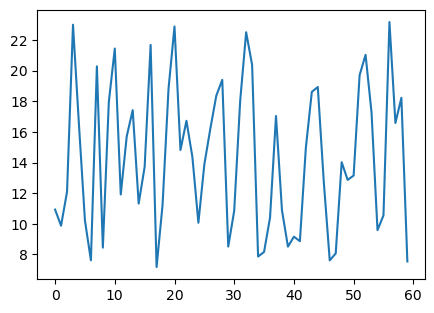

In [89]:
plt.figure(figsize=(5,3.5))
plt.plot(res);

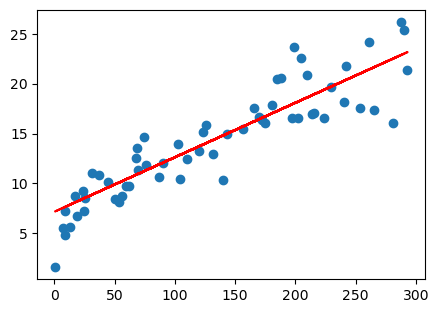

In [88]:
plt.figure(figsize=(5,3.5))
plt.scatter(x_test,y_test)
plt.plot(x_test, 7.14382225 + 0.05473199 * x_test, 'r')
plt.show()

#### Concluding with saying that above mention solution  is successfully able to predict the sales using advertising platform dataset